# Pyber Plots - Amanda Gaston

* 80% of drivers are located in Urban city types, which would most likely be a result of not as many people having cars in Urban city types as well as traffic density in an Urban city

* Some of the highest fares occur in the Rural city types, most likely due to a shortage of drivers in those areas, which would increase the fare rate, as well as longer distance trips due to the rural geography compared to a more urban city where things are more compact.

* Similarly, most of the lowest fares occur in the Urban city types, most likely due to the surplus of drivers + shorter distance trips due to the compact nature of an urban city.
-----

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data)
ride_df = pd.read_csv(ride_data)


In [2]:
ride_df.columns

Index(['city', 'date', 'fare', 'ride_id', 'Unnamed: 4', 'Unnamed: 5'], dtype='object')

In [3]:
ride_df = ride_df[["city", "date", "fare", "ride_id"]]
ride_df.head()

,city,date,fare,ride_id
0,Amandaburgh,3/5/18 02:15,26.28,9.068510e+11
1,Amandaburgh,2/24/18 23:10,43.66,6.573820e+12
2,Amandaburgh,2/10/18 20:42,36.17,6.455620e+12
3,Amandaburgh,1/11/18 02:22,29.24,7.279900e+12
4,Amandaburgh,1/21/18 04:12,9.26,5.528430e+12


In [4]:
rides_per_city = pd.DataFrame(ride_df["city"].value_counts())
rides_per_city.head()

,city
West Angela,39
South Karenland,38
North Jason,35
Liumouth,33
Port Frank,33


In [5]:
rides_per_city = rides_per_city.rename(columns={"city" : "rides"})
rides_per_city.head()

,rides
West Angela,39
South Karenland,38
North Jason,35
Liumouth,33
Port Frank,33


In [6]:
rides_per_city = rides_per_city.reset_index()
rides_per_city.head()

,index,rides
0,West Angela,39
1,South Karenland,38
2,North Jason,35
3,Liumouth,33
4,Port Frank,33


In [7]:
rides_per_city = rides_per_city.rename(columns={"index" : "city"})
rides_per_city.head()

,city,rides
0,West Angela,39
1,South Karenland,38
2,North Jason,35
3,Liumouth,33
4,Port Frank,33


In [8]:
ride_df = ride_df.groupby("city")
city_fare = pd.DataFrame(ride_df["fare"].sum())
city_fare.head()

,fare
city,
Amandaburgh,443.55
Barajasview,557.31
Barronchester,582.76
Bethanyland,593.21
Bradshawfurt,400.64


In [9]:
city_fare = city_fare.reset_index()
city_fare.head()

,city,fare
0,Amandaburgh,443.55
1,Barajasview,557.31
2,Barronchester,582.76
3,Bethanyland,593.21
4,Bradshawfurt,400.64


In [10]:
combined_df = pd.merge(rides_per_city, city_fare, on="city", how="outer")
combined_df.head()

,city,rides,fare
0,West Angela,39,1013.61
1,South Karenland,38,1008.35
2,North Jason,35,796.03
3,Liumouth,33,862.95
4,Port Frank,33,897.65


In [11]:
avg_fare = combined_df["fare"]/combined_df["rides"]
combined_df["average fare"] = avg_fare
combined_df.head()

,city,rides,fare,average fare
0,West Angela,39,1013.61,25.990000
1,South Karenland,38,1008.35,26.535526
2,North Jason,35,796.03,22.743714
3,Liumouth,33,862.95,26.150000
4,Port Frank,33,897.65,27.201515


In [12]:
master_data = pd.merge(combined_df, city_df, on="city", how="outer")
master_data.head()

,city,rides,fare,average fare,driver_count,type
0,West Angela,39,1013.61,25.990000,48,Urban
1,South Karenland,38,1008.35,26.535526,4,Urban
2,North Jason,35,796.03,22.743714,6,Urban
3,Liumouth,33,862.95,26.150000,69,Urban
4,Port Frank,33,897.65,27.201515,23,Urban


In [13]:
master_data = master_data.rename(columns={"city":"City", "rides":"Number of Rides", 
                                          "fare":"Total Fares", "average fare":"Average Fare", 
                                          "driver_count":"Number of Drivers", "type":"City Type"})
master_data.head()

,City,Number of Rides,Total Fares,Average Fare,Number of Drivers,City Type
0,West Angela,39,1013.61,25.990000,48,Urban
1,South Karenland,38,1008.35,26.535526,4,Urban
2,North Jason,35,796.03,22.743714,6,Urban
3,Liumouth,33,862.95,26.150000,69,Urban
4,Port Frank,33,897.65,27.201515,23,Urban


## Bubble Plot of Ride Sharing Data

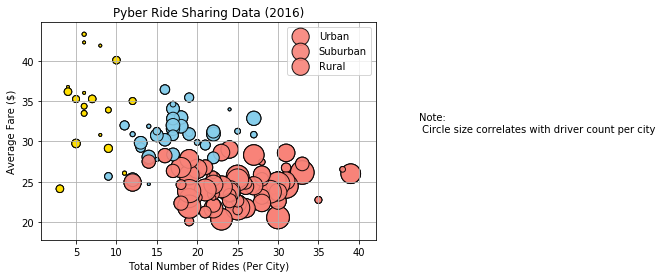

In [14]:
x_axis = master_data["Number of Rides"]
y_axis = master_data["Average Fare"]

urbancolors = np.where(master_data["City Type"]=="Urban", '#f88379', np.where(master_data["City Type"]=="Rural", '#ffdf00', '#87ceeb'))
ruralcolors = np.where(master_data["City Type"]=="Rural", '#ffdf00', np.where(master_data["City Type"]=="Urban", '#f88379', '#87ceeb'))
suburbancolors = np.where(master_data["City Type"]=="Suburban", '#87ceeb', np.where(master_data["City Type"]=="Rural", '#ffdf00', '#f88379'))

size = (master_data["Number of Drivers"])*8

urban = plt.scatter(x_axis, y_axis, c=urbancolors, s=size, edgecolors='k', alpha=0.90, label="Urban")
rural = plt.scatter(x_axis, y_axis, c=ruralcolors, s=size, edgecolors='k', alpha=0.90, label="Rural")
suburban = plt.scatter(x_axis, y_axis, c=suburbancolors, s=size, edgecolors='k', alpha=0.90, label="Suburban")

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()
plt.figtext(1, .5, "Note: \n Circle size correlates with driver count per city")

plt.legend((urban, suburban, rural), ('Urban', 'Suburban', 'Rural'), loc='best')

plt.show()


In [15]:
# Show plot
plt.show()

## Total Fares by City Type

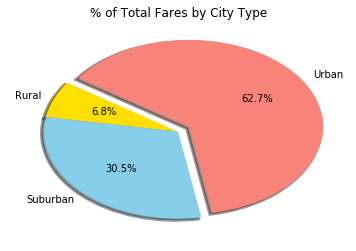

In [16]:
# Calculate Type Percents
urban_fares = master_data[master_data["City Type"]=="Urban"].sum()["Total Fares"]
suburban_fares = master_data[master_data["City Type"]=="Suburban"].sum()["Total Fares"]
rural_fares = master_data[master_data["City Type"]=="Rural"].sum()["Total Fares"]

# Build Pie Chart
sizes = [(urban_fares), (rural_fares), (suburban_fares)]
colors = ["#f88379", "#ffdf00", "#87ceeb"]
labels = ["Urban", "Rural", "Suburban"]
explode = (0.1, 0, 0)
plt.pie(sizes, labels=labels, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=280, wedgeprops = {'linewidth': 3})
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("images/PyberPieFares.png")

In [17]:
# Show Figure
plt.show()

## Total Rides by City Type

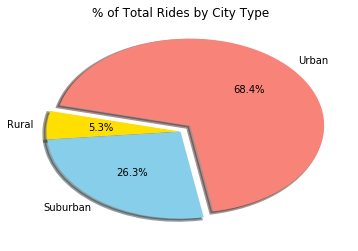

In [18]:
# Calculate Ride Percents
urban_rides = master_data[master_data["City Type"]=="Urban"].sum()["Number of Rides"]
suburban_rides = master_data[master_data["City Type"]=="Suburban"].sum()["Number of Rides"]
rural_rides = master_data[master_data["City Type"]=="Rural"].sum()["Number of Rides"]

# Build Pie Chart
sizes = [(urban_rides), (rural_rides), (suburban_rides)]
colors = ["#f88379", "#ffdf00", "#87ceeb"]
labels = ["Urban", "Rural", "Suburban"]
explode = (0.1, 0, 0)
plt.pie(sizes, labels=labels, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=280, wedgeprops = {'linewidth': 3})
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("images/PyberPieRides.png")


In [19]:
# Show Figure
plt.show()

## Total Drivers by City Type

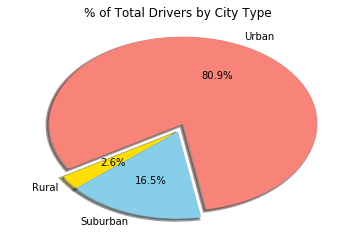

In [20]:
# Calculate Driver Percents
urban_drivers = master_data[master_data["City Type"]=="Urban"].sum()["Number of Drivers"]
suburban_drivers = master_data[master_data["City Type"]=="Suburban"].sum()["Number of Drivers"]
rural_drivers = master_data[master_data["City Type"]=="Rural"].sum()["Number of Drivers"]

# Build Pie Charts
sizes = [(urban_drivers), (rural_drivers), (suburban_drivers)]
colors = ["#f88379", "#ffdf00", "#87ceeb"]
labels = ["Urban", "Rural", "Suburban"]
explode = (0.1, 0, 0)
plt.pie(sizes, labels=labels, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=280, wedgeprops = {'linewidth': 3})
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("images/PyberPieDrivers.png")

In [21]:
# Show Figure
plt.show()